In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

### Preprocessing and notes about the data

* The data contains 11660 rows, out of which 942 values are Null. Leaving 10718 usable values. Luckily none of the null values are related to potatoes! 🥔 
* `Domain` column contains a single value, namely: Crops and livestock products. Which can be dropped. 
* Units: 
  - `Area harvested` is measured in `ha`
  - `Production` is measured in `tonnes`
  - `Yield` is measured in `hg/ha` (hectogram=100g per hectar)
* `Onions and shallots, dry (excluding dehydrated)` is a long name that is making harder to display the label on screen, therefore I renamed it to Onions. I keep the other rows containing `Onions` untouched to avoid confusion 
* Ite item `Other vegetables, fresh n.e.c.` is not interesting so I exclude it from the results

In [2]:
df_org = pd.read_csv('FAOSTAT_data_en_11-30-2022.csv')
df_org = df_org.sort_values(by='Year')
df_org.shape

(11660, 7)

In [3]:
df_org.head(3)

,Domain,Area,Element,Item,Year,Unit,Value
5186,Crops and livestock products,Netherlands,Production,Cauliflowers and broccoli,1961,tonnes,57067.0
7455,Crops and livestock products,Netherlands,Area harvested,Mushrooms and truffles,1961,ha,NaN
7793,Crops and livestock products,Netherlands,Area harvested,"Onions and shallots, dry (excluding dehydrated)",1961,ha,5957.0


In [4]:
for c in df_org.columns:
    print(c, df_org[c].unique())
    print()

Domain ['Crops and livestock products']

Area ['Netherlands' 'Belgium']

Element ['Production' 'Area harvested' 'Yield']

Item ['Cauliflowers and broccoli' 'Mushrooms and truffles'
 'Onions and shallots, dry (excluding dehydrated)' 'Peas, dry' 'Wheat'
 'Eggplants (aubergines)' 'Grapes' 'Flax, processed but not spun'
 'Cantaloupes and other melons' 'Other vegetables, fresh n.e.c.'
 'Canary seed' 'Broad beans and horse beans, green' 'Cabbages'
 'Strawberries' 'Tomatoes' 'Asparagus'
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw'
 'Sugar beet' 'Carrots and turnips' 'Pears' 'Rape or colza seed'
 'Other berries and fruits of the genus vaccinium n.e.c.'
 'Broad beans and horse beans, dry' 'Beans, dry' 'Maize (corn)'
 'Peas, green' 'True hemp, raw or retted' 'Barley' 'Apples'
 'Other beans, green' 'Cucumbers and gherkins' 'Linseed' 'Potatoes'
 'Poppy seed' 'Mixed grain' 'Spinach' 'Plums and sloes'
 'Lettuce and chicory' 'Rye' 'Onions and shallots, green' 'Raspberr

In [5]:
df_org.isnull().sum()

Domain       0
Area         0
Element      0
Item         0
Year         0
Unit         0
Value      942
dtype: int64

In [6]:
df_org[df_org.Value.isnull()].Item.unique()

array(['Mushrooms and truffles', 'Asparagus',
       'Other berries and fruits of the genus vaccinium n.e.c.',
       'True hemp, raw or retted', 'Onions and shallots, green',
       'Raspberries', 'Currants', 'Pumpkins, squash and gourds',
       'Chicory roots', 'Blueberries', 'Canary seed', 'Mixed grain',
       'Gooseberries', 'Green garlic', 'Other pulses n.e.c.', 'Sorghum',
       'Soya beans', 'Peaches and nectarines', 'Vanilla, raw',
       'Green corn (maize)', 'Quinces', 'Grapes', 'Hop cones', 'Linseed',
       'Beans, dry', 'Broad beans and horse beans, dry', 'Poppy seed',
       'Peas, dry',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Walnuts, in shell'], dtype=object)

In [7]:
df = df_org.drop(columns=['Domain', 'Unit']).dropna()
df = df.replace('Onions and shallots, dry (excluding dehydrated)', 'Onions')
df = df[df.Item != 'Other vegetables, fresh n.e.c.']
print(df.isnull().sum())
print(df.shape)
display(df.head(3))

Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64
(10478, 5)


,Area,Element,Item,Year,Value
5186,Netherlands,Production,Cauliflowers and broccoli,1961,57067.0
7793,Netherlands,Area harvested,Onions,1961,5957.0
8930,Netherlands,Area harvested,"Peas, dry",1961,23909.0


### sub-question 1: What are the top 5 agricultural products in the Netherlands in terms of production in tonnes for the year 2020?

The Netherlands biggest agricultural product turns out to be Potatoes!! That's actually positively surprising. That production was about 7 million tonnes in the year 2020. Sugar beet comes in close second at about 6.7 million tonnes. Onions and shallots comes in far third with 1.7 million tonnes. Followed by Wheat and Tomatoes just under 1 million tonnes each.  

,Item,Value
9773,Potatoes,7020060.0
11041,Sugar beet,6691360.0
7972,Onions,1701290.0
11659,Wheat,931830.0
11230,Tomatoes,910000.0


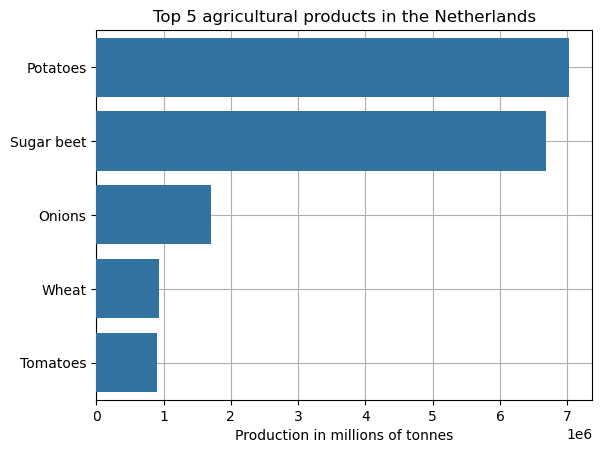

In [8]:
subq1 = df[(df.Area == 'Netherlands') & (df.Element == 'Production') & (df.Year == 2020)]\
    .sort_values(by='Value', ascending=False)\
    .head(5)[['Item', 'Value']]

display(subq1)

sns.barplot(data=subq1, x='Value', y='Item', color='C0', zorder=3)
plt.title('Top 5 agricultural products in the Netherlands')
plt.xlabel('Production in millions of tonnes')
plt.ylabel('')
plt.grid(zorder=0)
plt.savefig('subq1.svg', bbox_inches = 'tight')
plt.show()

### sub-question 2: What are the top 5 agricultural products in Belgium in terms of production in tonnes for the year 2020?

The results are interesting. Since Potatoes are only Belgium's second biggest agricultural product with about 4 million tonnes, which comes after Sugar beet with about 4.8 million tonnes. The third biggest agricultural product in belgium is Wheat at 1.74 million tonnes, followed by Lettuce 0.5 million tonnes and Maize (corn) at 0.4 million tonnes. 


,Item,Value
2778,Sugar beet,4783970.0
2263,Potatoes,3928910.0
3135,Wheat,1741480.0
1353,Lettuce and chicory,538900.0
1479,Maize (corn),421010.0


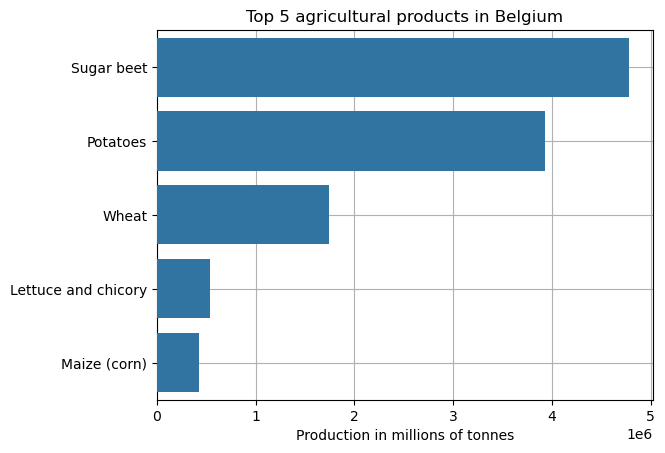

In [9]:
subq2 = df[(df.Area == 'Belgium') & (df.Element == 'Production') & (df.Year == 2020)]\
    .sort_values(by='Value', ascending=False)\
    .head(5)[['Item', 'Value']]

display(subq2)

sns.barplot(data=subq2, x='Value', y='Item', color='C0', zorder=3)
plt.title('Top 5 agricultural products in Belgium')
plt.xlabel('Production in millions of tonnes')
plt.ylabel('')
plt.grid(zorder=0)
plt.savefig('subq2.svg', bbox_inches = 'tight')
plt.show()

### Bonus: Bar chart race, format for flourish.studio

The resulting table has many missing values because there are some products that do not have a known value for each year. We assume that the value for that year is 0 since it will not show in the top 5 products anyway. 

In [10]:
bonus = pd.concat([df[(df.Element == 'Production') & (df.Area == 'Netherlands') & (df.Item == product)]\
           [['Year', 'Value']]\
           .rename(columns={'Value': product})\
           .set_index('Year')\
           .T \
           for product in df.Item.unique()])

bonus = bonus.fillna(0)
display(bonus.head(3))

bonus.to_csv('bonus_nl.csv')

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Cauliflowers and broccoli,57067.0,57461.0,47404.0,58893.0,50444.0,48845.0,60386.0,52615.0,52997.0,49073.0,...,57000.0,53000.0,51000.0,52200.0,65500.0,62300.0,70400.0,70030.0,65710.0,69800.0
Onions,215424.0,209494.0,193311.0,217883.0,195970.0,190633.0,261099.0,266000.0,283991.0,338846.0,...,1540900.0,1353000.0,1310000.0,1379000.0,1504100.0,1449400.0,1779600.0,1264800.0,1737650.0,1701290.0
"Peas, dry",85795.0,70531.0,73000.0,68988.0,44395.0,34584.0,48386.0,35757.0,40095.0,38770.0,...,2053.0,2530.0,3000.0,3125.0,2508.0,2563.0,2563.0,0.0,0.0,0.0


In [11]:
bonus = pd.concat([df[(df.Element == 'Production') & (df.Area == 'Belgium') & (df.Item == product)]\
           [['Year', 'Value']]\
           .rename(columns={'Value': product})\
           .set_index('Year')\
           .T \
           for product in df.Item.unique()])

bonus = bonus.fillna(0)
display(bonus.head(3))

bonus.to_csv('bonus_be.csv')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Cauliflowers and broccoli,85100.0,81100.0,85800.0,95000.0,85682.0,86212.0,92000.0,92000.0,92800.0,88000.0,...,99660.0,98100.0,96000.0,99200.0,110060.0,112706.0,129044.0,122340.0,127570.0,131900.0
Onions,28329.0,30680.0,32180.0,41125.0,41250.0,53020.0,55200.0,66200.0,72700.0,78300.0,...,74500.0,74500.0,79000.0,102300.0,108250.0,130775.0,92850.0,105380.0,161310.0,176500.0
"Peas, dry",5900.0,6100.0,4900.0,8656.0,6150.0,4582.0,3451.0,3142.0,3531.0,5306.0,...,3617.0,2300.0,1500.0,2587.0,3940.0,2595.0,2887.0,2560.0,2500.0,2520.0


In [12]:
display(HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/12004836"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))

In [13]:
display(HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/12005322"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))

### sub-question 3:	What are the top 5 agricultural products in the Netherlands in terms of hectares harvested in the year 2020?

,Item,Value
9653,Potatoes,164500.0
11539,Wheat,108910.0
10921,Sugar beet,81460.0
3679,Barley,38380.0
7852,Onions,35940.0


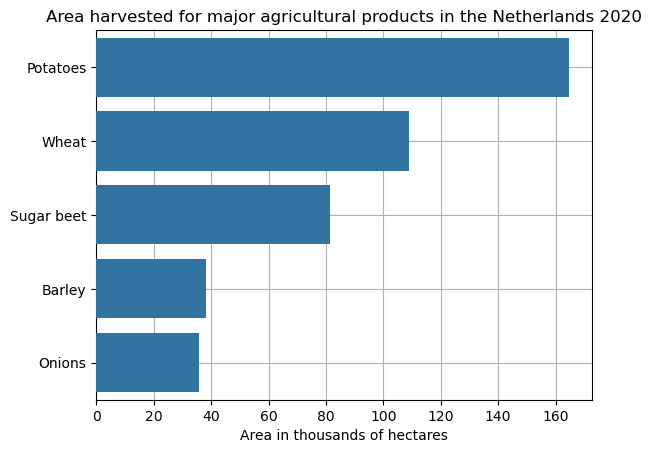

In [14]:
subq3 = df[(df.Area == 'Netherlands') & (df.Element == 'Area harvested') & (df.Year == 2020)]\
    .sort_values(by='Value', ascending=False)\
    .head(5)[['Item', 'Value']]

display(subq3)

g = sns.barplot(data=subq3, x='Value', y='Item', color='C0', zorder=3)

g.set_xticks(list(range(0, 170000, 20000)))
xlabels = ['{:.0f}'.format(x) for x in g.get_xticks() / 1000]
g.set_xticklabels(xlabels)

plt.title('Area harvested for major agricultural products in the Netherlands 2020')
plt.xlabel('Area in thousands of hectares')
plt.ylabel('')
plt.grid(zorder=0)
plt.savefig('subq3.svg', bbox_inches = 'tight')
plt.show()

### sub-question 4: What are the top 5 agricultural products in Belgium in terms of hectares harvested in the year 2020?

,Item,Value
3093,Wheat,194660.0
2221,Potatoes,97340.0
2736,Sugar beet,56750.0
1437,Maize (corn),51880.0
176,Barley,43970.0


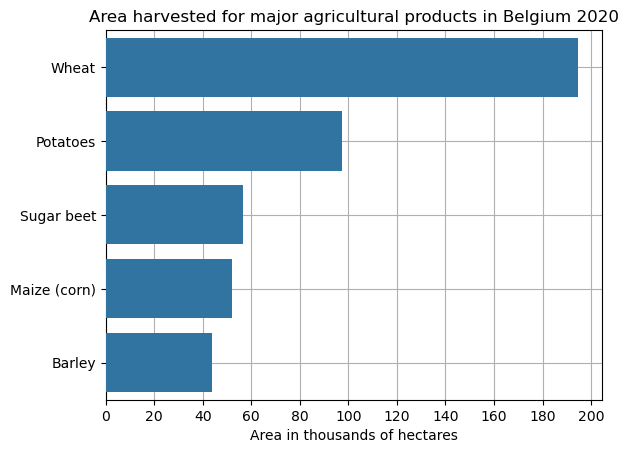

In [15]:
subq4 = df[(df.Area == 'Belgium') & (df.Element == 'Area harvested') & (df.Year == 2020)]\
    .sort_values(by='Value', ascending=False)\
    .head(5)[['Item', 'Value']]

display(subq4)

g = sns.barplot(data=subq4, x='Value', y='Item', color='C0', zorder=3)

g.set_xticks(list(range(0, 220000, 20000)))
xlabels = ['{:.0f}'.format(x) for x in g.get_xticks() / 1000]
g.set_xticklabels(xlabels)

plt.title('Area harvested for major agricultural products in Belgium 2020')
plt.xlabel('Area in thousands of hectares')
plt.ylabel('')
plt.grid(zorder=0)
plt.savefig('subq4.svg', bbox_inches = 'tight')
plt.show()

### sub-question 5: What trends are noticeable when comparing the potato production in the Netherlands between 1961 and 2020?

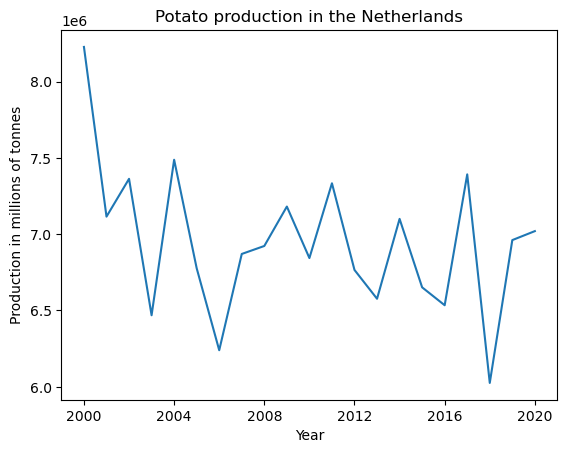

In [16]:
subq5 = df[(df.Area == 'Netherlands') & (df.Element == 'Production') & (df.Item == 'Potatoes') & (df.Year >= 2000)]\
    .sort_values(by='Year')[['Year', 'Value']]

g = sns.lineplot(data=subq5, y='Value',x='Year')

g.set_xticks(list(range(2000, 2021, 4)))

plt.title('Potato production in the Netherlands')
plt.ylabel('Production in millions of tonnes')
plt.savefig('subq5.svg', bbox_inches = 'tight')

plt.show()

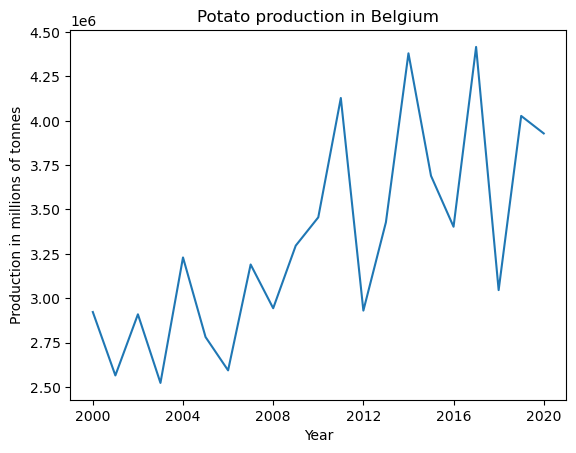

In [17]:
subq6 = df[(df.Area == 'Belgium') & (df.Element == 'Production') & (df.Item == 'Potatoes')]\
    .sort_values(by='Year')[['Year', 'Value']]

g = sns.lineplot(data=subq6, y='Value', x='Year')

g.set_xticks(list(range(2000, 2021, 4)))

plt.title('Potato production in Belgium')
plt.ylabel('Production in millions of tonnes')
plt.savefig('subq6.svg', bbox_inches = 'tight')

plt.show()

In [18]:
df.dtypes

Area        object
Element     object
Item        object
Year         int64
Value      float64
dtype: object

### Trend analysis

We notice that the Dutch data has a weak negative correlation. i.e. production decreases as year increases. 

While the Belgian data shows a strong positive correlation where production increases as year increases.

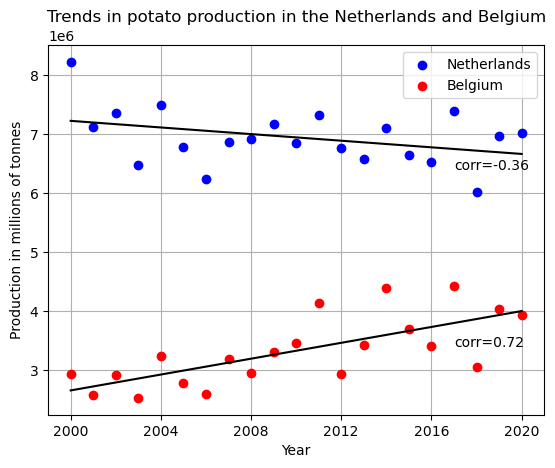

In [19]:
fig, ax = plt.subplots(1,1)
plt.grid(zorder=0)

X = np.reshape(subq5['Year'].values, (-1,1))
y = subq5['Value'].values
corr, _ = pearsonr(subq5['Year'].values, y)
ax.text(2017, 6.4e6, f'corr={corr:.2f}')

reg = LinearRegression().fit(X, y)
subq5_pred = reg.predict(X)

plt.scatter(X, y, c='b', label='Netherlands', zorder=3)
plt.plot(X, subq5_pred, c='k', zorder=4)

X = np.reshape(subq6['Year'].values, (-1,1))
y = subq6['Value'].values
corr, _ = pearsonr(subq6['Year'].values, y)
ax.text(2017, 3.4e6, f'corr={corr:.2f}')
        
reg = LinearRegression().fit(X, y)
subq6_pred = reg.predict(X)

plt.scatter(X, y, c='r', label='Belgium', zorder=3)
plt.plot(X, subq6_pred, c='k', zorder=4)

ax.set_xticks(list(range(2000, 2021, 4)))

plt.ylabel('Production in millions of tonnes')
plt.xlabel('Year')
plt.title('Trends in potato production in the Netherlands and Belgium')

plt.legend()

plt.savefig('trends.svg')
plt.show()